In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

In [ ]:
plt.style.use("cyberpunk")

In [2]:
df = pd.read_csv('../data/total_kickstarter.csv')

In [5]:
df.dtypes

id                  int64
name               object
category           object
main_category      object
currency           object
launched           object
deadline           object
pledged           float64
usd_pledged       float64
goal              float64
backers             int64
country            object
spotlight          object
staff_pick         object
result              int64
duration            int64
month_launched     object
dtype: object

In [ ]:
df.drop_duplicates(['id'],inplace = True)

## Unique Kickstarter

In [ ]:
udf = pd.read_csv('../data/unique_ks.csv')

In [ ]:
udf.drop(columns = 'Unnamed: 0',inplace = True)

In [ ]:
udf['creator'] = udf['creator'].map(lambda x : x.split(':')[2].split(',')[0][1:-1])

In [ ]:
udf['result'] = udf['state'].copy()

In [ ]:
udf.drop(columns = 'state',inplace = True)

In [ ]:
udf = udf.loc[(udf['result']=='successful')|(udf['result']=='failed')].copy()

In [ ]:
udf['result'] = udf['result'].map({'successful':1,'failed':0})

In [ ]:
unique_creat = []
for k,v in (udf['creator'].value_counts()).items():
    if ' ' in k and v > 1:
        unique_creat.append(k)

In [ ]:
# for i in udf['creator']:
#     udf.loc[udf['creator'] ==i,'attempts']= len(udf.loc[udf['creator']==i]['result'].tolist())
#     udf.loc[udf['creator'] ==i,'success']= sum(udf.loc[udf['creator']==i]['result'].tolist())

In [ ]:
udf.to_csv('../data/unique_ks_up.csv',index = False)

In [7]:
udf = pd.read_csv('../data/unique_ks_up.csv')

In [8]:
gb_udf = udf.loc[udf['attempts']>1]

In [ ]:
udf.loc[udf['creator']=='"ON!" - Clariden Robotic Team']

In [9]:
gb_udf[gb_udf['success']> gb_udf['attempts']/2]

,creator,id,name,category,main_category,currency,launched,deadline,pledged,usd_pledged,goal,backers,country,spotlight,staff_pick,result,attempts,success
2,SideKick Lab,662057057,Mars Attacks: Uprising Trading Cards The all-n...,comics,comics,USD,2020-02-03 08:59:31,2020-03-03 23:00:00,169760.00,169760.00,25000.0,526,US,True,True,1,4,4
5,Queen Games,399627160,Escape Roll & Write A cooperative game for the...,tabletop games,games,USD,2020-05-20 10:23:48,2020-06-01 10:23:48,93934.50,93934.50,5000.0,1613,US,True,False,1,7,7
9,Joseph Oliveira,962366265,STAY AWAKE #1-#3 - A Psychological Horror Comi...,comics,comics,GBP,2020-03-30 05:02:17,2020-04-29 05:02:17,8204.31,10218.47,2400.0,422,GB,True,True,1,8,8
11,Spencer Campbell,1571839106,Slayers A tabletop RPG of monster hunting in a...,tabletop games,games,USD,2020-06-30 11:00:05,2020-07-30 11:00:05,17507.00,17507.00,1500.0,807,US,True,False,1,2,2
12,Nicholas Williams,792990448,Take 'As I Go Ramblin' Around' To New Heights!...,country & folk,music,USD,2019-03-20 16:14:37,2019-04-19 16:14:37,15634.00,15634.00,15000.0,259,US,True,False,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164019,Derek,1600191077,Kitty Cat Pet Fountains Kitty Cat Fountains fo...,crafts,crafts,USD,2015-03-03 07:19:47,2015-03-24 07:19:47,382.00,382.00,150.0,9,US,True,False,1,6,4
164020,Ben Harris,1706988832,Life has a Soundtrack. Control Yours. GoGlov...,wearables,technology,USD,2014-07-04 00:15:27,2014-08-03 00:15:27,25342.00,25342.00,50000.0,253,US,False,True,0,3,2
164029,Wieb,1409012589,CORTAZU: HIGH-QUALITY OUTERWEAR AT A REVOLUTIO...,apparel,fashion,EUR,2018-02-12 11:03:47,2018-03-28 11:03:47,395926.00,484830.89,25000.0,1041,NL,True,False,1,4,4
164030,Dennis Lohmann,779408585,paperesk / eye catching papercraft models Buil...,crafts,crafts,EUR,2016-01-15 15:23:37,2016-02-14 15:23:37,5725.00,6228.88,1500.0,334,DE,True,True,1,2,2


In [10]:
gb_udf['launched'] = gb_udf['launched'].map(lambda x : pd.to_datetime(x)).copy()
gb_udf['deadline'] = gb_udf['deadline'].map(lambda x : pd.to_datetime(x)).copy()

/Users/tylerzarnik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tylerzarnik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
gb_udf['duration'] = (gb_udf['deadline'] - gb_udf['launched']).dt.days

/Users/tylerzarnik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


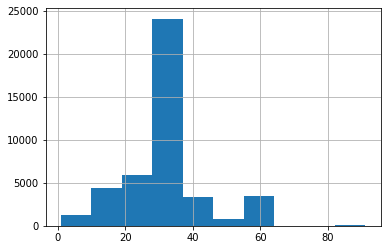

In [12]:
gb_udf['duration'].hist()

In [6]:
udf.to_csv('../data/unique_ks_up.csv',index = False)

NameError: name 'udf' is not defined

## visaualizations

In [ ]:
df['duration'].hist();

In [ ]:
plt.hist(x = df['duration'],bins = 10,);

In [ ]:
plt.figure(figsize = (16,10))
plt.hist(df['duration'])
plt.hist(df.loc[df['result']==1]['duration'])
plt.title('Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 10',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
mplcyberpunk.add_glow_effects();

In [ ]:
plt.figure(figsize = (16,10))
plt.hist(df_cov['duration'])
plt.hist(df_cov.loc[df_cov['result']==1]['duration'])
plt.title('Covid-19: Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 10',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
mplcyberpunk.add_glow_effects();

In [ ]:
plt.figure(figsize = (16,10))
plt.hist(df['duration'],bins = 11)
plt.hist(df.loc[df['result']==1]['duration'],bins = 11)
plt.title('Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 11',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
mplcyberpunk.add_glow_effects();

In [ ]:
plt.figure(figsize = (16,10))
plt.hist(df_cov['duration'],bins = 11)
plt.hist(df_cov.loc[df_cov['result']==1]['duration'],bins = 11)
plt.title('Covid-19: Distribution of Duration of Campaigns in Days With Color Portion of Success: Bins 11',fontsize = 20)
plt.xlabel('Duration',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
mplcyberpunk.add_glow_effects();

In [ ]:
df['main_category'].value_counts().keys()

In [ ]:
plt.figure(figsize = (16,10))
plt.bar(x = df['main_category'].value_counts().keys(), height = df['main_category'].value_counts())
plt.bar(x = df.loc[df['result']==1]['main_category'].value_counts().keys(), height = df.loc[df['result']==1]['main_category'].value_counts())
plt.xlabel('Main Categories', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Main Categories Frequency vs Success', fontsize = 20)
mplcyberpunk.add_glow_effects()
plt.tight_layout;

In [ ]:
plt.figure(figsize = (16,10))
plt.bar(x = df_cov['main_category'].value_counts().keys(), height = df_cov['main_category'].value_counts())
plt.bar(x = df_cov.loc[df_cov['result']==1]['main_category'].value_counts().keys(), height = df_cov.loc[df_cov['result']==1]['main_category'].value_counts())
plt.xlabel('Main Categories', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Covid-19: Main Categories Frequency vs Success', fontsize = 20)
mplcyberpunk.add_glow_effects()
plt.tight_layout;

In [ ]:
plt.figure(figsize = (16,10))
df.loc[(df['backers'] < 500)]['backers'].hist(bins = 15)
df.loc[(df['backers']<500) & (df['result']==1)]['backers'].hist(bins = 15)
plt.xlabel('Number of Backers Per Campaign',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.title('Distribution of Goals with Success Highlighted in USD',fontsize = 20)
# mplcyberpunk.add_glow_effects()
plt.tight_layout;

In [ ]:
plt.figure(figsize = (16,10))

df[df['goal']<50000]['goal'].hist(bins = 15)
df[(df['goal']<50000)&(df['result']==1)]['goal'].hist(bins = 15)
plt.xlabel('Amount in USD',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.title('Distribution of Goals with Success Highlighted in USD',fontsize = 20)
# mplcyberpunk.add_glow_effects()
plt.tight_layout;

In [ ]:
plt.figure(figsize = (16,10))
plt.bar(x = df['month_launched'].value_counts().keys(), height = df['month_launched'].value_counts())
plt.bar(x = df.loc[df['result']==1]['month_launched'].value_counts().keys(), height = df.loc[df['result']==1]['month_launched'].value_counts())
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Number of Campaigns per Month: Color Denotes Success', fontsize = 20)
plt.xticks(np.arange(12), (['Jul','Mar','May','Jun','Apr','Oct','Nov','Feb','Aug','Sep','Jan','Dec']),fontsize = 15)
plt.yticks(fontsize = 15)
mplcyberpunk.add_glow_effects()
plt.tight_layout;

In [ ]:
df['launched'] = df['launched'].map(lambda x : pd.to_datetime(x))
df['deadline'] = df['deadline'].map(lambda x : pd.to_datetime(x))

In [ ]:
df_cov = df.loc[(df['launched'].dt.year == 2020) & (df['launched'].dt.month.isin([3,4,5,6,7]))]

In [ ]:
df_cov['result'].value_counts(normalize = True)

In [ ]:
df['result'].value_counts(normalize = True)

In [ ]:
df_cov.loc[df_cov['result']==1]['main_category'].value_counts().keys()

In [ ]:
df_cov.loc[df_cov['result']==1]['main_category'].value_counts()

In [ ]:
df_cov.loc[df_cov['result']==0]['main_category'].value_counts()

In [ ]:
2896/(177 + 2896)

In [ ]:
for k,v in df['main_category'].value_counts().items():
    print(k,v)

In [ ]:
cat_success = {}
for k,v in df.loc[df['result']==1]['main_category'].value_counts().items():
    cat_success[k] = v
    

In [ ]:
cate = {}
for k,v in df['main_category'].value_counts().items():
    cate[k] = v

In [ ]:
cat_success

In [ ]:
cate

for k_s,v_s in cat_success:
    for k_c,v_c in cate:
        if k_s == k_c:
            cat_success[k_s]/